[View in Colaboratory](https://colab.research.google.com/github/plaban1981/AppliedMQ/blob/master/Optimal_tuning_parameters.ipynb)

**Topics**

1. Review of K-fold cross-validation
2. Review of parameter tuning using cross_val_score
3. More efficient parameter tuning using GridSearchCV
4. Searching multiple parameters simultaneously
5. Using the best parameters to make predictions
6. Reducing computational expense using RandomizedSearchCV




# **1. Review of K-fold cross-validation**

**Steps for cross-validation:**

*   Dataset is split into K "folds" of equal size
*   Each fold acts as the testing set 1 time, and acts as the training set K-1 times
*   Average testing performance is used as the estimate of out-of-sample performance
*   Also known as cross-validated performance



**Benefits of cross-validation:**

* More reliable estimate of out-of-sample performance than train/test split
* Reduce the variance of a single trial of a train/test split
* Can be used for
* Selecting tuning parameters
* Choosing between models
* Selecting features

**Drawbacks of cross-validation:**

* Can be computationally expensive
 * Especially when the data set is very large or the model is slow to train


# 2. Review of parameter tuning using cross_val_score
Goal: Select the best tuning parameters (aka "hyperparameters") for KNN on the iris dataset

To select the best value of k for KNN model to predict species

In [1]:
# imports 
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

print('X matrix dimensionality:', X.shape)
print('Y vector dimensionality:', y.shape)

X matrix dimensionality: (150, 4)
Y vector dimensionality: (150,)


In [4]:
# 10-fold (cv=10) cross-validation with K=5 (n_neighbors=5) for KNN (the n_neighbors parameter)

# instantiate model
knn = KNeighborsClassifier(n_neighbors=5)

# store scores in scores object
# scoring metric used here is 'accuracy' because it's a classification problem
# cross_val_score takes care of splitting X and y into the 10 folds that's why we pass X and y entirely instead of X_train and y_train
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [5]:
# use average accuracy as an estimate of out-of-sample accuracy

# scores is a numpy array so we can use the mean method
print(scores.mean())

0.9666666666666668


In [6]:
# search for an optimal value of K for KNN

# list of integers 1 to 30
# integers we want to try
k_range = range(1, 31)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


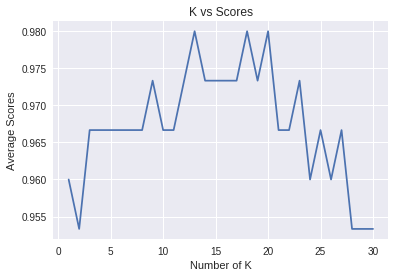

In [7]:
plt.plot(range(1,31),k_scores)
plt.xlabel('Number of K')
plt.ylabel('Average Scores')
plt.title('K vs Scores')
plt.show()

# 3. More efficient parameter tuning using GridSearchCV¶
Allows you to define a grid of parameters that will be searched using K-fold cross-validation

This is like an automated version of the "for loop" above

In [0]:
from sklearn.model_selection import GridSearchCV

In [9]:
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [11]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [0]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

* Grid object is ready to do 10-fold cross validation on a KNN model using classification accuracy as the evaluation metric
    * In addition, there is a parameter grid to repeat the 10-fold cross validation process 30 times
    * Each time, the n_neighbors parameter should be given a different value from the list
    * We can't give GridSearchCV just a list
      * We've to specify n_neighbors should take on 1 through 30
* You can set n_jobs = -1 to run computations in parallel (if supported by your computer and OS)
  * This is also called parallel programming

In [13]:
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

# Remember this is running 10-fold validation 30 times

KNN model is being fit and predictions are being made 30 x 10 = 300 times

In [14]:
# view the complete results (list of named tuples)
grid.grid_scores_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [23]:
K_neigbors = grid.cv_results_['param_n_neighbors'].data.tolist()
K_neigbors

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [25]:
mean_scores = grid.cv_results_['mean_test_score'].tolist()
mean_scores

[0.96,
 0.9533333333333334,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9733333333333334,
 0.9666666666666667,
 0.9666666666666667,
 0.9733333333333334,
 0.98,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.98,
 0.9733333333333334,
 0.98,
 0.9666666666666667,
 0.9666666666666667,
 0.9733333333333334,
 0.96,
 0.9666666666666667,
 0.96,
 0.9666666666666667,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334]

Text(0.5,1,'Optimal K values')

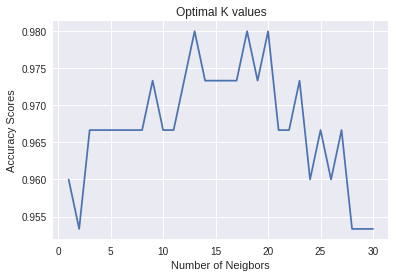

In [26]:
plt.plot(K_neigbors,mean_scores)
plt.xlabel('Number of Neigbors')
plt.ylabel('Accuracy Scores')
plt.title('Optimal K values')

# List of 30 named tuples

* First tuple
    * When n_neighbors = 1
    * Mean of accuracy scores = 0.96
    * Standard deviation of accuracy scores = 0.053
      * If SD is high, the cross-validated estimate of the accuracy might not be as reliable
* There is one tuple for each of the 30 trials of CV

In [28]:
# examine the first tuple
# we will slice the list and select its elements using dot notation and []


print('Parameters')
print(grid.grid_scores_[0].parameters)

# Array of 10 accuracy scores during 10-fold cv using the parameters
print('')
print('CV Validation Score')
print(grid.grid_scores_[0].cv_validation_scores)

# Mean of the 10 scores
print('')
print('Mean Validation Score')
#print(grid.grid_scores_[0].mean_validation_score)
print(grid.cv_results_['mean_test_score'][0])

Parameters
{'n_neighbors': 1}

CV Validation Score
[1.         0.93333333 1.         0.93333333 0.86666667 1.
 0.86666667 1.         1.         1.        ]

Mean Validation Score
0.96


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [29]:
grid.cv_results_

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

{'mean_fit_time': array([0.00069759, 0.00034382, 0.00035157, 0.00034304, 0.00034938,
        0.00034082, 0.0003366 , 0.00035834, 0.00035179, 0.0003324 ,
        0.00034106, 0.00034344, 0.00035546, 0.00037184, 0.00035439,
        0.00035939, 0.00033693, 0.00033948, 0.00034022, 0.00034873,
        0.00034854, 0.00035064, 0.00035756, 0.00035133, 0.00035386,
        0.00035388, 0.00035856, 0.00035136, 0.00034087, 0.00034299]),
 'mean_score_time': array([0.00063272, 0.00059941, 0.00059783, 0.00059967, 0.00061707,
        0.00060196, 0.00059693, 0.00062153, 0.0006197 , 0.0005976 ,
        0.00059552, 0.00061717, 0.0006551 , 0.00066972, 0.00064206,
        0.00063684, 0.0006572 , 0.00065482, 0.0006305 , 0.00065575,
        0.00063677, 0.00063643, 0.00064631, 0.00065429, 0.00068107,
        0.00066252, 0.00066986, 0.00066988, 0.00068412, 0.0006542 ]),
 'mean_test_score': array([0.96      , 0.95333333, 0.96666667, 0.96666667, 0.96666667,
        0.96666667, 0.96666667, 0.96666667, 0.97333333, 0

In [30]:
# create a list of the mean scores only
# list comprehension to loop through grid.grid_scores
grid_mean_scores = [result for result in grid.cv_results_['mean_test_score']]
print(grid_mean_scores)

[0.96, 0.9533333333333334, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.98, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.98, 0.9733333333333334, 0.98, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.96, 0.9666666666666667, 0.96, 0.9666666666666667, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


In [31]:
grid.cv_results_['mean_test_score']

array([0.96      , 0.95333333, 0.96666667, 0.96666667, 0.96666667,
       0.96666667, 0.96666667, 0.96666667, 0.97333333, 0.96666667,
       0.96666667, 0.97333333, 0.98      , 0.97333333, 0.97333333,
       0.97333333, 0.97333333, 0.98      , 0.97333333, 0.98      ,
       0.96666667, 0.96666667, 0.97333333, 0.96      , 0.96666667,
       0.96      , 0.96666667, 0.95333333, 0.95333333, 0.95333333])

Text(0,0.5,'Cross-Validated Accuracy')

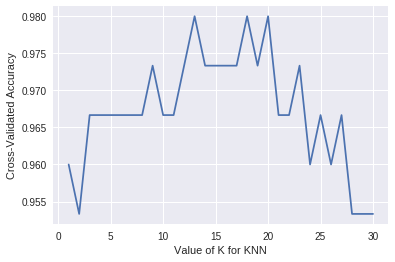

In [30]:
# plot the results
# this is identical to the one we generated above
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [32]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


# 4. Searching multiple parameters simultaneously
Example: tuning max_depth and min_samples_leaf for a DecisionTreeClassifier
Could tune parameters independently: change max_depth while leaving min_samples_leaf at its default value, and vice versa
But, best performance might be achieved when neither parameter is at its default value

In [0]:
# define the parameter values that should be searched
k_range = list(range(1, 31))

# Another parameter besides k that we might vary is the weights parameters
# default options --> uniform (all points in the neighborhood are weighted equally)
# another option --> distance (weights closer neighbors more heavily than further neighbors)

# we create a list
weight_options = ['uniform', 'distance']

In [34]:
# create a parameter grid: map the parameter names to the values that should be searched
# dictionary = dict(key=values, key=values)
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [35]:
# instantiate and fit the grid
# exhaustive grid-search because it's trying every combination
# 10-fold cross-validation is being performed 30 x 2 = 60 times

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [36]:
# view the complete results
grid.grid_scores_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, para

In [37]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

# Best score did not improve for this model

0.98
{'n_neighbors': 13, 'weights': 'uniform'}


# 5. Using the best parameters to make predictions

In [40]:
# train your model using all data and the best known parameters

# instantiate model with best parameters
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')

# fit with X and y, not X_train and y_train
# even if we use train/test split, we should train on X and y before making predictions on new data
# otherwise we throw away potential valuable data we can learn from
knn.fit(X, y)

# make a prediction on out-of-sample data
knn.predict([[3, 5, 4, 2]])

array([1])

In [44]:
#shortcut: 
# GridSearchCV automatically refits the best model using all of the data
# that best fitted model is stored in grid object 
# we can then use prediction using the best fitted model
# code in this cell is the same as the top

grid.predict([[3, 5, 4, 2]])

array([1])

# 6. Reducing computational expense using RandomizedSearchCV¶
  * This is a close cousin to GridSearchCV
  * Searching many different parameters at once may be computationally infeasible

  * For example
         * Searching 10 parameters (each range of 1000)
         * Require 10,000 trials of CV
         * 100,000 model fits with 10-fold CV
         * 100,000 predictions with 10-fold CV

* RandomizedSearchCV searches a subset of the parameters, and you control the computational "budget"
    * You can decide how long you want it to run for depending on the computational time we have

In [45]:
from sklearn.grid_search import RandomizedSearchCV
# specify "parameter distributions" rather than a "parameter grid"

# since both parameters are discrete, so param_dist is the same as param_grid
param_dist = dict(n_neighbors=k_range, weights=weight_options)

# if parameters are continuous (like regularization)

# n_iter controls the number of searches

# instantiate model
# 2 new params
# n_iter --> controls number of random combinations it will try
# random_state for reproducibility 
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)

# fit
rand.fit(X, y)

# scores
rand.grid_scores_

/usr/local/lib/python3.6/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


[mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 16},
 mean: 0.96667, std: 0.03333, params: {'weights': 'uniform', 'n_neighbors': 22},
 mean: 0.98000, std: 0.03055, params: {'weights': 'uniform', 'n_neighbors': 18},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 27},
 mean: 0.95333, std: 0.04269, params: {'weights': 'uniform', 'n_neighbors': 29},
 mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 22},
 mean: 0.97333, std: 0.04422, params: {'weights': 'uniform', 'n_neighbors': 14},
 mean: 0.97333, std: 0.04422, params: {'weights': 'distance', 'n_neighbors': 12},
 mean: 0.97333, std: 0.03266, params: {'weights': 'uniform', 'n_neighbors': 15}]

In [46]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)
print(rand.best_estimator_)

0.98
{'weights': 'uniform', 'n_neighbors': 18}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='uniform')


In [47]:
# run RandomizedSearchCV 20 times (with n_iter=10) and record the best score

best_scores = []

for _ in list(range(20)):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10)
    rand.fit(X, y)
    best_scores.append(rand.best_score_)

print(best_scores)

[0.98, 0.98, 0.98, 0.98, 0.98, 0.9733333333333334, 0.98, 0.9733333333333334, 0.9733333333333334, 0.98, 0.9733333333333334, 0.9733333333333334, 0.98, 0.9733333333333334, 0.98, 0.98, 0.98, 0.98, 0.9733333333333334, 0.98]
